In [1]:
import json

data = json.load(open('manual_data.json'))

island = data['treasureIslandTiles']
treasure_base_value = data['treasureIslandBaseValue']
expedition_costs = data['treasureIslandExpeditionCosts']

/Users/lorenzosiegabattel/Downloads/imc-prosperity/venv/lib/python3.12/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/Users/lorenzosiegabattel/Downloads/imc-prosperity/venv/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1, Fitness = 48393.16249180128
Generation = 2, Fitness = 153231.7060973986
Generation = 3, Fitness = 159862.98394618323
Generation = 4, Fitness = 159862.98394618323
Generation = 5, Fitness = 159862.98394618323
Generation = 6, Fitness = 159862.98394618323
Generation = 7, Fitness = 159862.98394618323
Generation = 8, Fitness = 159862.98394618323
Generation = 9, Fitness = 159862.98394618323
Generation = 10, Fitness = 159862.98394618323
Generation = 11, Fitness = 159862.98394618323
Generation = 12, Fitness = 159862.98394618323
Generation = 13, Fitness = 159862.98394618323
Generation = 14, Fitness = 169760.9365322335
Generation = 15, Fitness = 173654.48973286763
Generation = 16, Fitness = 173654.48973286763
Generation = 17, Fitness = 173654.48973286763
Generation = 18, Fitness = 173654.48973286763
Generation = 19, Fitness = 173654.48973286763
Generation = 20, Fitness = 173654.48973286763
Generation = 21, Fitness = 173654.48973286763
Generation = 22, Fitness = 173654.48973286763


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parameters of the best solution: [14.  3. 12.]
Fitness value of the best solution = 180257.2858680954
Index of the best solution: 0


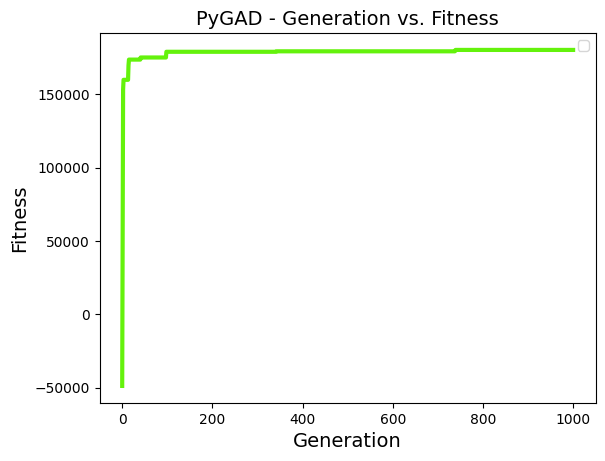

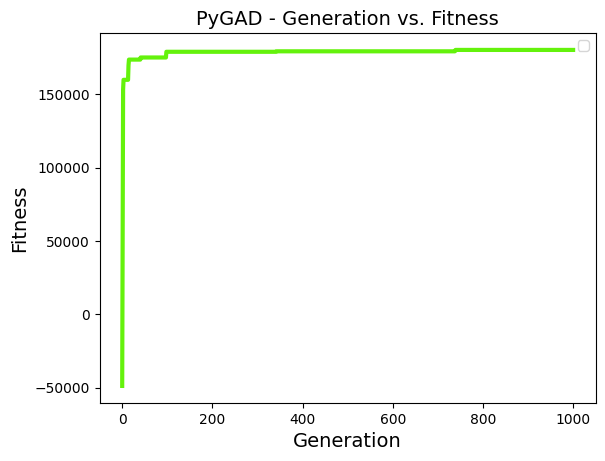

In [2]:
import pygad

fit = {}

def fitness_func(ga_instance: pygad.GA, solution, solution_idx):
    if ga_instance.generations_completed not in fit:
        n_players_per_tile = [0] * len(island)
        
        for i, sol in enumerate(ga_instance.population):
            for tile in sol:
                if tile < len(island):
                    n_players_per_tile[tile.astype(int)] += 1

        fit[ga_instance.generations_completed] = (n_players_per_tile, sum(n_players_per_tile))

    n_players_per_tile, players_sum = fit[ga_instance.generations_completed]
    
    reward = 0
    base_treasure = 7500
    penalty = 1
    for tile in solution:
        if tile < len(island):
            reward += base_treasure * island[tile.astype(int)]['multiplier'] / (island[tile.astype(int)]['hunters'] + (n_players_per_tile[tile.astype(int)] - 1) / players_sum * 100)
            reward -= expedition_costs[str(penalty)]
            penalty += 1
            
    return reward


last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}, Fitness = {ga_instance.best_solution()[1]}")
    last_fitness = ga_instance.best_solution()[1]

ga_instance = pygad.GA(num_generations=1000,
                       num_parents_mating=2000,
                       initial_population=[[3, 6, 14] for _ in range(3000)],
                       fitness_func=fitness_func,
                       sol_per_pop=3000,
                       gene_space=[range(len(island) + 3), range(len(island) + 3), range(len(island) + 3)],
                       num_genes=3,
                       parent_selection_type="rank",
                       allow_duplicate_genes=False,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution: {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution: {solution_idx}")
ga_instance.plot_fitness()

In [42]:
list(map(lambda e: island[e.astype(int)] if e < len(island) else None, solution)), solution_fitness

([{'coordinates': {'x': 28, 'y': 2}, 'multiplier': 87, 'hunters': 5},
  {'coordinates': {'x': 27, 'y': 3}, 'multiplier': 89, 'hunters': 5},
  {'coordinates': {'x': 28, 'y': 4}, 'multiplier': 85, 'hunters': 5}],
 185741.1835330432)

In [44]:
list(map(lambda e: island[e.astype(int)] if e < len(island) else None, solution)), solution_fitness

([{'coordinates': {'x': 26, 'y': 3}, 'multiplier': 73, 'hunters': 4},
  {'coordinates': {'x': 28, 'y': 2}, 'multiplier': 87, 'hunters': 5},
  {'coordinates': {'x': 27, 'y': 3}, 'multiplier': 89, 'hunters': 5}],
 186814.66019857157)

In [3]:
list(map(lambda e: island[e.astype(int)] if e < len(island) else None, solution)), solution_fitness

([{'coordinates': {'x': 27, 'y': 3}, 'multiplier': 89, 'hunters': 5},
  {'coordinates': {'x': 28, 'y': 4}, 'multiplier': 85, 'hunters': 5},
  {'coordinates': {'x': 26, 'y': 3}, 'multiplier': 73, 'hunters': 4}],
 180257.2858680954)